# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_found = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units  = "imperial"

record_number = 1
set_number = 1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather = requests.get(query_url).json()
    if weather["cod"] == 200:
        cities_found.append(city)
        lat.append(weather['coord']['lat'])
        lon.append(weather['coord']['lon'])
        temp_max.append(weather['main']['temp_max'])
        humidity.append(weather['main']['humidity'])
        clouds.append(weather['clouds']['all'])
        wind.append(weather['wind']['speed'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        print (f"Processing Record {record_number} of set {set_number} | {city}")
    else:
        print("City not found. Skipping...")
    
    record_number += 1
    set_number +=1
    
        


City not found. Skipping...
Processing Record 2 of set 2 | hermanus
Processing Record 2 of set 2 | new norfolk
Processing Record 2 of set 2 | kodiak
Processing Record 2 of set 2 | puerto ayora
Processing Record 2 of set 2 | avarua
Processing Record 2 of set 2 | xuddur
Processing Record 2 of set 2 | shihezi
Processing Record 2 of set 2 | jamestown
Processing Record 2 of set 2 | lufilufi
Processing Record 2 of set 2 | vaini
Processing Record 2 of set 2 | ushuaia
Processing Record 2 of set 2 | saskylakh
Processing Record 2 of set 2 | cape town
Processing Record 2 of set 2 | peruibe
Processing Record 2 of set 2 | lebu
Processing Record 2 of set 2 | margate
Processing Record 2 of set 2 | barrow
Processing Record 2 of set 2 | kavaratti
Processing Record 2 of set 2 | namatanai
Processing Record 2 of set 2 | evensk
Processing Record 2 of set 2 | kysyl-syr
Processing Record 2 of set 2 | saldanha
Processing Record 2 of set 2 | rikitea
Processing Record 2 of set 2 | nouadhibou
City not found. Ski

Processing Record 23 of set 23 | qaanaaq
Processing Record 23 of set 23 | nikolskoye
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of set 25 | torbay
City not found. Skipping...
Processing Record 26 of set 26 | saint-francois
Processing Record 26 of set 26 | zhangye
Processing Record 26 of set 26 | nokaneng
Processing Record 26 of set 26 | canberra
Processing Record 26 of set 26 | aklavik
Processing Record 26 of set 26 | airai
Processing Record 26 of set 26 | izhevskoye
Processing Record 26 of set 26 | hasaki
Processing Record 26 of set 26 | roma
Processing Record 26 of set 26 | bengkulu
Processing Record 26 of set 26 | nizhniy tsasuchey
Processing Record 26 of set 26 | kapaa
Processing Record 26 of set 26 | ostrovnoy
Processing Record 26 of set 26 | lorengau
Processing Record 26 of set 26 | umtata
Processing Record 26 of set 26 | gorin
Processing Record 26 of set 26 | eureka
Processing Record 26 of set 26 | kaitangata
Processing Record 26 of set 26 | kuy

Processing Record 34 of set 34 | lazaro cardenas
Processing Record 34 of set 34 | pochutla
Processing Record 34 of set 34 | seoul
Processing Record 34 of set 34 | banjarmasin
Processing Record 34 of set 34 | srandakan
Processing Record 34 of set 34 | cuajinicuilapa
Processing Record 34 of set 34 | kimbe
City not found. Skipping...
Processing Record 35 of set 35 | sayyan
Processing Record 35 of set 35 | kinablangan
Processing Record 35 of set 35 | gamba
Processing Record 35 of set 35 | nilanga
Processing Record 35 of set 35 | eyl
Processing Record 35 of set 35 | manzhouli
Processing Record 35 of set 35 | sompeta
Processing Record 35 of set 35 | fatezh
Processing Record 35 of set 35 | saint anthony
Processing Record 35 of set 35 | manbij
Processing Record 35 of set 35 | koeru
Processing Record 35 of set 35 | buala
Processing Record 35 of set 35 | seymchan
Processing Record 35 of set 35 | grand-santi
Processing Record 35 of set 35 | voi
Processing Record 35 of set 35 | marigot
Processing 

Processing Record 44 of set 44 | singaraja
Processing Record 44 of set 44 | grafton
Processing Record 44 of set 44 | dawei
Processing Record 44 of set 44 | okaihau
Processing Record 44 of set 44 | yumen
Processing Record 44 of set 44 | det udom
Processing Record 44 of set 44 | toora-khem
Processing Record 44 of set 44 | yala


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {'City': cities_found,
                'Lat' : lat,
                'Lng' : lon,
                "Max_Temp" : temp_max,
                "Humidity" : humidity,
                "Cloudiness" : clouds,
                "Wind_Speed" : wind,
                "Country" : country,
                "Date" : date}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,hermanus,-34.4187,19.2345,64.99,79,94,6.11,ZA,1619539285
1,new norfolk,-42.7826,147.0587,48.99,88,24,3.27,AU,1619539469
2,kodiak,57.7900,-152.4072,42.80,87,90,20.71,US,1619539469
3,puerto ayora,-0.7393,-90.3518,82.40,69,20,3.44,EC,1619539327
4,avarua,-21.2078,-159.7750,69.80,100,99,1.14,CK,1619539470
...,...,...,...,...,...,...,...,...,...
561,okaihau,-35.3167,173.7833,55.00,94,91,1.01,NZ,1619539682
562,yumen,40.2833,97.2000,47.66,17,14,11.70,CN,1619539682
563,det udom,14.9060,105.0784,84.99,83,99,4.61,TH,1619539683
564,toora-khem,52.4675,96.1100,34.68,93,100,3.33,RU,1619539683


In [5]:
summary_all=weather_df.describe()
summary_all

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,18.814098,19.266314,62.738039,67.908127,56.081272,7.670707,1.619540e+09
std,32.974793,90.891999,21.158007,22.749394,36.961550,4.909261,1.064376e+02
min,-54.800000,-175.200000,-3.190000,5.000000,0.000000,0.360000,1.619539e+09
25%,-8.105875,-64.010750,48.015000,53.000000,20.000000,3.890000,1.619539e+09
50%,20.608450,24.019150,66.200000,72.000000,69.500000,6.565000,1.619540e+09
75%,46.472525,101.349975,78.995000,86.000000,90.000000,10.360000,1.619540e+09
max,78.218600,178.416700,109.400000,100.000000,100.000000,29.930000,1.619540e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [51]:
num_hum_gret_100 = len(weather_df.loc[weather_df['Humidity']<100])
print(type(num_hum_gret_100))
print(num_hum_gret_100)


<class 'int'>
14


In [58]:
num_hum_gret_100 = len(weather_df.loc[weather_df['Humidity']<100])

if num_hum_gret_100 > 0:
    weather_hum_df = weather_df.loc[weather_df['Humidity']<100]
    summary_all=weather_hum_df.describe()
    
summary_all


,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.330011,19.358013,62.771920,67.094203,55.628623,7.740743,1.619540e+09
std,32.839496,89.892627,21.320607,22.446674,37.078052,4.927033,1.057588e+02
min,-54.800000,-174.350000,-3.190000,5.000000,0.000000,0.360000,1.619539e+09
25%,-7.587600,-63.097825,48.000000,53.000000,20.000000,3.905000,1.619539e+09
50%,21.123300,24.019150,66.400000,72.000000,68.000000,6.630000,1.619540e+09
75%,46.598675,100.378650,79.292500,85.000000,90.000000,10.515000,1.619540e+09
max,78.218600,178.416700,109.400000,99.000000,100.000000,29.930000,1.619540e+09


In [59]:
#  Get the indices of cities that have humidity over 100%.

humidity_index = weather_df[weather_df['Humidity'] == 100].index

In [60]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.drop(humidity_index, inplace = False)

In [62]:
clean_city_data.head()


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,hermanus,-34.4187,19.2345,64.99,79,94,6.11,ZA,1619539285
1,new norfolk,-42.7826,147.0587,48.99,88,24,3.27,AU,1619539469
2,kodiak,57.7900,-152.4072,42.80,87,90,20.71,US,1619539469
3,puerto ayora,-0.7393,-90.3518,82.40,69,20,3.44,EC,1619539327
5,xuddur,4.1213,43.8894,83.52,54,100,3.27,SO,1619539470


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

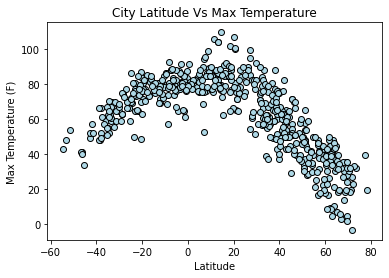

In [26]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Max_Temp
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("City Latitude Vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

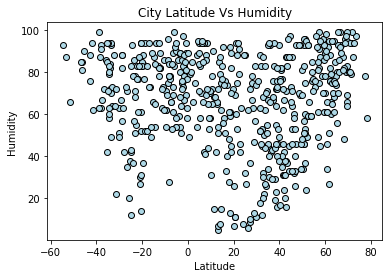

In [27]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Humidity
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("City Latitude Vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

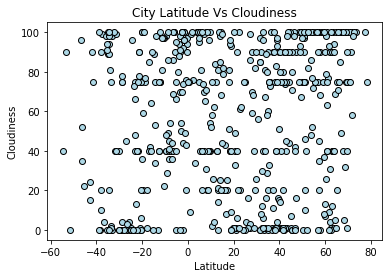

In [28]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Cloudiness
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("City Latitude Vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

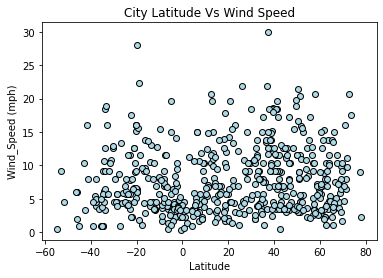

In [29]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Wind_Speed
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("City Latitude Vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.show()

## Linear Regression

In [31]:
clean_city_data_north = clean_city_data.loc[weather_df['Lat'] >= 0 ]
clean_city_data_north
clean_city_data_south = clean_city_data.loc[weather_df['Lat'] < 0 ]
clean_city_data_south

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,hermanus,-34.4187,19.2345,64.99,79,94,6.11,ZA,1619539285
1,new norfolk,-42.7826,147.0587,48.99,88,24,3.27,AU,1619539469
3,puerto ayora,-0.7393,-90.3518,82.40,69,20,3.44,EC,1619539327
8,lufilufi,-13.8745,-171.5986,78.01,94,98,13.00,WS,1619539471
10,ushuaia,-54.8000,-68.3000,42.80,93,40,0.43,AR,1619539225
...,...,...,...,...,...,...,...,...,...
555,kununurra,-15.7667,128.7333,78.80,89,90,9.22,AU,1619539423
556,biak,-0.9131,122.8766,76.64,81,43,3.27,ID,1619539680
557,alofi,-19.0595,-169.9187,82.15,77,100,22.41,NU,1619539623
558,singaraja,-8.1120,115.0882,78.57,78,41,5.06,ID,1619539681


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.86


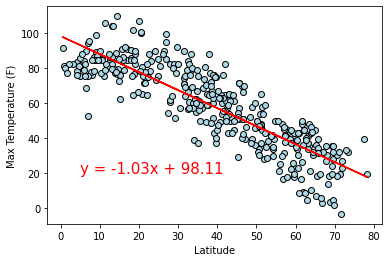

In [32]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Max_Temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.77


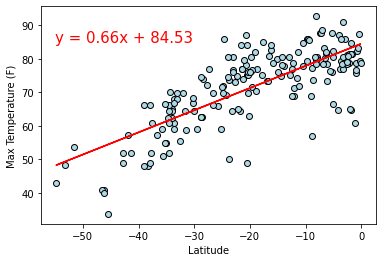

In [33]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Max_Temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22


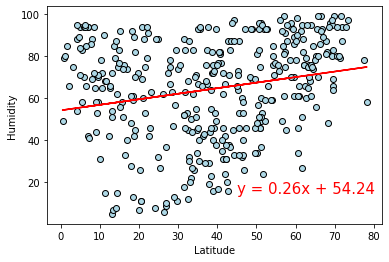

In [35]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03


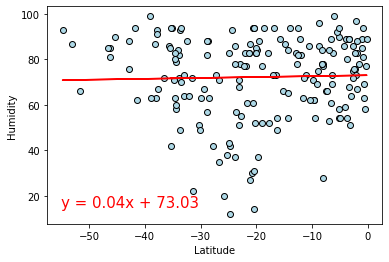

In [37]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14


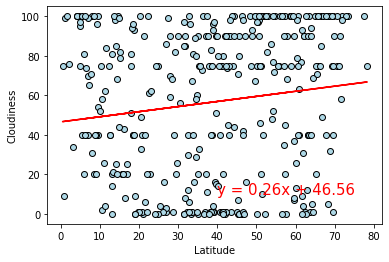

In [39]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")


plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25


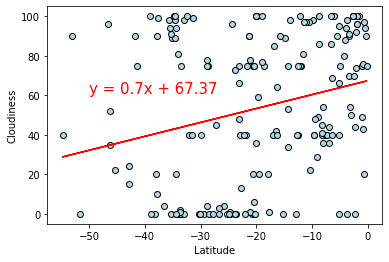

In [48]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,61),fontsize=15,color="red")


plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07


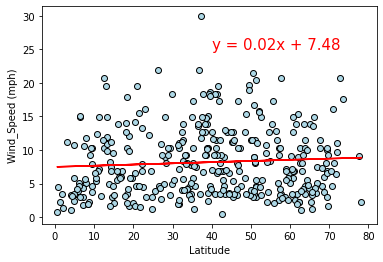

In [47]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Wind_Speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.07


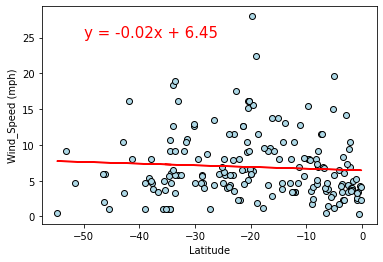

In [46]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Wind_Speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()